In [167]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.color import label2rgb, rgb2gray
import numpy as np
import cv2


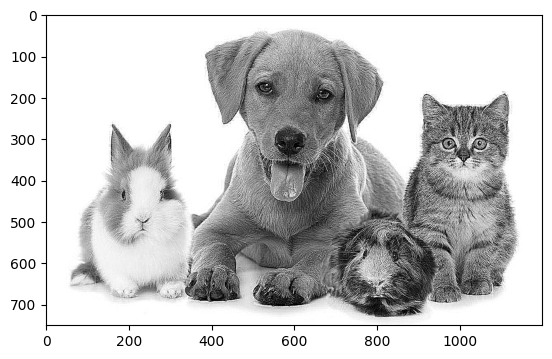

In [222]:
img = cv2.imread("/content/image2.png", 0)

sharpening_filter = np.array([[-1,-1,-1],
                             [-1, 9 , -1],
                             [-1,-1,-1]])

#kernel_size = np.ones((5, 5), float) / 25

image = cv2.filter2D(img, -1, sharpening_filter)

#image = cv2.filter2D(img, -1, kernel_size)

#image = cv2.equalizeHist(image)
plt.imshow(image, cmap='gray')
scale = 0.6 #microns/pixel

In [223]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(image)
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [224]:
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
%matplotlib inline

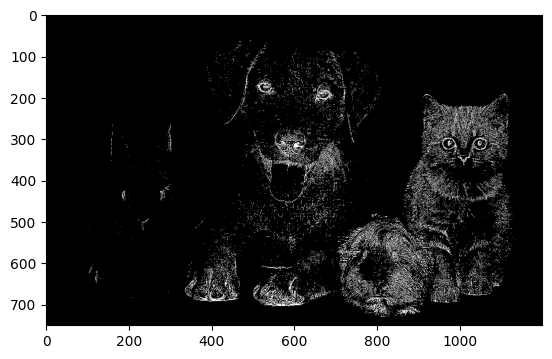

In [225]:
thresholded_img = image < 19

#thresholded_img = image < threshold
plt.imshow(thresholded_img, cmap='gray')


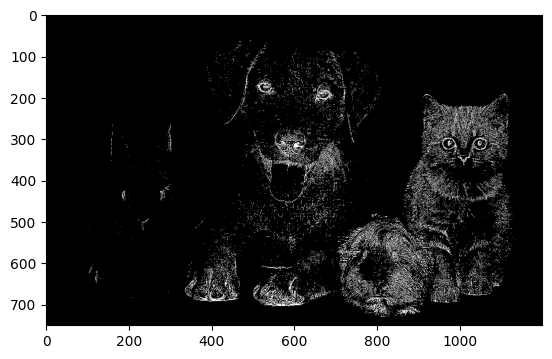

In [226]:
from skimage.segmentation import clear_border
edge_touching_removed = clear_border(thresholded_img)
plt.imshow(edge_touching_removed, cmap='gray')

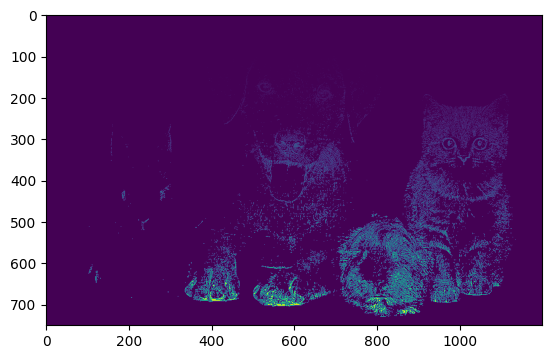

In [227]:
label_image = measure.label(edge_touching_removed, connectivity=image.ndim)

plt.imshow(label_image)

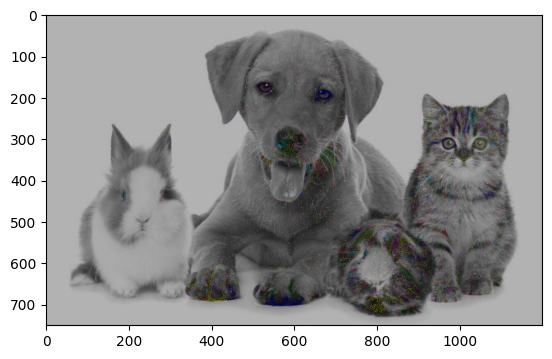

In [228]:
image_label_overlay = label2rgb(label_image, image=img)
plt.imshow(image_label_overlay)

In [229]:
all_props=measure.regionprops(label_image, image)

In [230]:
for prop in all_props:
    print('Label: {} Area: {}'.format(prop.label, prop.area))

Streaming output truncated to the last 5000 lines.
Label: 4412 Area: 7
Label: 4413 Area: 4
Label: 4414 Area: 1
Label: 4415 Area: 3
Label: 4416 Area: 1
Label: 4417 Area: 2
Label: 4418 Area: 2
Label: 4419 Area: 1
Label: 4420 Area: 5
Label: 4421 Area: 7
Label: 4422 Area: 6
Label: 4423 Area: 6
Label: 4424 Area: 1
Label: 4425 Area: 2
Label: 4426 Area: 2
Label: 4427 Area: 5
Label: 4428 Area: 2
Label: 4429 Area: 1
Label: 4430 Area: 1
Label: 4431 Area: 3
Label: 4432 Area: 1
Label: 4433 Area: 2
Label: 4434 Area: 2
Label: 4435 Area: 5
Label: 4436 Area: 1
Label: 4437 Area: 5
Label: 4438 Area: 2
Label: 4439 Area: 2
Label: 4440 Area: 2
Label: 4441 Area: 2
Label: 4442 Area: 1
Label: 4443 Area: 1
Label: 4444 Area: 26
Label: 4445 Area: 2
Label: 4446 Area: 1
Label: 4447 Area: 2
Label: 4448 Area: 1
Label: 4449 Area: 1
Label: 4450 Area: 2
Label: 4451 Area: 1
Label: 4452 Area: 4
Label: 4453 Area: 4
Label: 4454 Area: 2
Label: 4455 Area: 1
Label: 4456 Area: 3
Label: 4457 Area: 5
Label: 4458 Area: 2
Label: 4

In [231]:
props = measure.regionprops_table(label_image, image,
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity'])

In [234]:
import pandas as pd
df = pd.DataFrame(props)
print(df.head())

   label  area  equivalent_diameter  mean_intensity  solidity
0      1     1             1.128379        0.000000       1.0
1      2     3             1.954410        5.333333       1.0
2      3     4             2.256758        2.000000       1.0
3      4     1             1.128379        0.000000       1.0
4      5     1             1.128379       14.000000       1.0


In [235]:
df = df[df['area'] > 50]
print(df.head())

      label  area  equivalent_diameter  mean_intensity  solidity
398     399    75             9.772050        1.493333  0.423729
545     546   370            21.704807        1.624324  0.405257
571     572   476            24.618327        1.838235  0.386364
1101   1102    75             9.772050        1.240000  0.465839
1225   1226   414            22.959120        1.038647  0.334681


In [236]:
df['area_sq_microns'] = df['area'] * (scale**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (scale)
print(df.head())

      label  area  equivalent_diameter  mean_intensity  solidity  \
398     399    75             9.772050        1.493333  0.423729   
545     546   370            21.704807        1.624324  0.405257   
571     572   476            24.618327        1.838235  0.386364   
1101   1102    75             9.772050        1.240000  0.465839   
1225   1226   414            22.959120        1.038647  0.334681   

      area_sq_microns  equivalent_diameter_microns  
398             27.00                     5.863230  
545            133.20                    13.022884  
571            171.36                    14.770996  
1101            27.00                     5.863230  
1225           149.04                    13.775472  
